In [1]:
import cv2
import numpy as np
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from google.colab.patches import cv2_imshow

In [2]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

###folder path

In [ ]:
#use this string for the path to the folder containing all the images in google drive

folder_path = '/content/drive/MyDrive/Semester2/Deep_learning/PROJECT_DEEP_LEARNING/'

##about videos and duration and number of frames


In [ ]:
import os

directory_files = os.listdir(folder_path+ 'UCF101')

In [ ]:
#makingg a dataframe to contain all the info about individual videos

df = pd.DataFrame()

for fold in directory_files:
    videos_in_folder = os.listdir(folder_path+ 'UCF-101/' + fold)
    for avi in videos_in_folder:
        vdo = cv2.VideoCapture(folder_path+ 'UCF-101/' + fold + '/' + avi)
        length = int(vdo.get(cv2.CAP_PROP_FRAME_COUNT))
        width = int(vdo.get(cv2.CAP_PROP_FRAME_WIDTH))
        height = int(vdo.get(cv2.CAP_PROP_FRAME_HEIGHT))
        fps = int(vdo.get(cv2.CAP_PROP_FPS))       

        vdo.release()
        df = df.append({'video_name': avi , 'frames': length, 'frame_width': width, 'frame_height' : height, 'frames_ps': fps}, ignore_index=True)




In [ ]:
df.to_csv(folder_path+ 'utf101_dataframe.csv')

In [ ]:
df.describe()

In [ ]:
# df.frames_ps.value_counts()

In [ ]:
# df.frame_width.value_counts()

##reading a video frame by frame

In [ ]:

#reading a video

vdo = cv2.VideoCapture(folder_path+'UCF-101/ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c01.avi')
counter= 0
while True:
    ret, frame = vdo.read()
    if ret:
        cv2_imshow(frame)
        # Wait for 25 milliseconds and check if the user has pressed the 'q' key to quit
        counter+=1
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break
    else:
        break
vdo.release()
print(counter) #number of frames in the video

# Class Index

In [ ]:
class_indices_file = open(folder_path+'UCF101TrainTestSplits-RecognitionTask/ucfTrainTestlist/classInd.txt', 'r')
class_index = {}
for line in class_indices_file:
    class_ = line.split(' ')
    class_index[class_[1].strip('\n')] = int(class_[0])

class_indices_file.close()

In [ ]:
class_index

{'ApplyEyeMakeup': 1,
 'ApplyLipstick': 2,
 'Archery': 3,
 'BabyCrawling': 4,
 'BalanceBeam': 5,
 'BandMarching': 6,
 'BaseballPitch': 7,
 'Basketball': 8,
 'BasketballDunk': 9,
 'BenchPress': 10,
 'Biking': 11,
 'Billiards': 12,
 'BlowDryHair': 13,
 'BlowingCandles': 14,
 'BodyWeightSquats': 15,
 'Bowling': 16,
 'BoxingPunchingBag': 17,
 'BoxingSpeedBag': 18,
 'BreastStroke': 19,
 'BrushingTeeth': 20,
 'CleanAndJerk': 21,
 'CliffDiving': 22,
 'CricketBowling': 23,
 'CricketShot': 24,
 'CuttingInKitchen': 25,
 'Diving': 26,
 'Drumming': 27,
 'Fencing': 28,
 'FieldHockeyPenalty': 29,
 'FloorGymnastics': 30,
 'FrisbeeCatch': 31,
 'FrontCrawl': 32,
 'GolfSwing': 33,
 'Haircut': 34,
 'Hammering': 35,
 'HammerThrow': 36,
 'HandstandPushups': 37,
 'HandstandWalking': 38,
 'HeadMassage': 39,
 'HighJump': 40,
 'HorseRace': 41,
 'HorseRiding': 42,
 'HulaHoop': 43,
 'IceDancing': 44,
 'JavelinThrow': 45,
 'JugglingBalls': 46,
 'JumpingJack': 47,
 'JumpRope': 48,
 'Kayaking': 49,
 'Knitting': 50,

In [ ]:
#--------------------Number of classes----------------
len(class_index)

101

##train_set and test_set file reading

In [ ]:
#considering only one test train split 01
train_path_file = open(folder_path + "ucfTrainTestlist_recogintion/trainlist01.txt", "r")
train_path_list = []
train_y = []
# print(next(train_path_file))
for _ in train_path_file:
    path, class_num = _.split(' ')
    train_path_list.append(path)
    train_y.append(int(class_num.strip('\n')))

train_path_file.close()


In [ ]:
# train_y[0]

In [ ]:
# print(train_path_list[1])
# print(train_path_list[1002])
# print(train_y[1002])


###note that the class indexx number starts with 1 and not 0

In [ ]:
test_path_file = open(folder_path + "ucfTrainTestlist_recogintion/testlist01.txt", "r")
test_path_list = []
test_y = []
# print(next(test_path_file))
for _ in test_path_file:
    path = _.strip('\n')
    test_path_list.append(path)

    a,b = path.split('/')
    test_y.append(class_index[a])

test_path_file.close()

In [ ]:
# print(test_path_list[100])
# print(test_y[100])
# class_index['Archery']

##saving frames and accessing them (while using for training):

In [ ]:




video_capture = cv2.VideoCapture(folder_path +'UCF-101/ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c02.avi')
total_frames = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))

frame_arr = []
for frame_num in range(total_frames):
    ret, frame = video_capture.read()
    if ret:
      frame_arr.append(frame)   #frames are np_array
    else:
      break

video_capture.release()

print(total_frames)

cv2_imshow(frame_arr[0])



##preprocessing the dataset

In [ ]:
#fetch 20 frames of each video
video1 = cv2.VideoCapture(folder_path +'UCF-101/ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c02.avi')
total_frames = video1.get(cv2.CAP_PROP_FRAME_COUNT)
interval = total_frames // 20
frame_count = 0

while video1.isOpened():
    ret, frame = video1.read()
    
    if not ret:  #reached end of video
        break
        
    if frame_count % interval == 0:
        cv2_imshow(frame)
        
    if frame_count >= 20 * interval:
        break
        
    frame_count += 1
    
video1.release()


# getting only 10 classes of videos in the training and testing list

In [ ]:
import random

In [ ]:
req_classes = sorted(random.sample(list(np.arange(1,101,1)), 10))
class_names = []
for _ in req_classes:
    class_names.append([key for key in list(class_index.keys()) if class_index[key] == _][0])
class_names

['BodyWeightSquats',
 'Haircut',
 'HandstandWalking',
 'HighJump',
 'JumpRope',
 'MilitaryParade',
 'ParallelBars',
 'PoleVault',
 'Rowing',
 'TableTennisShot']

In [ ]:
#considering only one test train split 01
train_path_file = open(folder_path + "UCF101TrainTestSplits-RecognitionTask/ucfTrainTestlist/trainlist01.txt", "r")
train_path_list = []
train_y = []
# print(next(train_path_file))
for _ in train_path_file:
    path, class_num = _.split(' ')
    if (int(class_num.strip('\n')) in req_classes):
        train_path_list.append(path)
        train_y.append(int(class_num.strip('\n')))
        
    
train_path_file.close()


In [ ]:
len(train_path_list)

928

In [ ]:
test_path_file = open(folder_path + "UCF101TrainTestSplits-RecognitionTask/ucfTrainTestlist/testlist01.txt", "r")
test_path_list = []
test_y = []
# print(next(test_path_file))
for _ in test_path_file:
    path = _.strip('\n')
    a,b = path.split('/')
    if (class_index[a] in req_classes):
        test_path_list.append(path)
        test_y.append(class_index[a])


test_path_file.close()

In [ ]:
len(test_path_list)

357

# Using generators to access data batchwise

In [ ]:
import numpy as np
import keras

# def generate_X_Y(train=True):

#     if train == True:
#         Y_labels = []
#         X_train_path = []
#         path = folder_path + 'ucfTrainTestlist_recogintion/trainlist01.txt'
#         f = open(path)
#         for line in f:
#             vid, label = line.split()
#             X_train_path.append(vid) 
#             Y_labels.append(label)
#         return X_train_path, Y_labels
#     else:
#         Y_labels = []
#         X_test_path = []
#         path = folder_path + 'ucfTrainTestlist_recogintion/testlist01.txt'
#         f = open(path)
#         for line in f:
#             vid, label = line.split()
#             X_test_path.append(vid) 
#             Y_labels.append(label)
#         return X_test_path, Y_labels



class VideoGenerator(keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, X=train_path_list, Y=train_y, batch_size=32):
        'Initialization'
        self.batch_size = batch_size
        self.X = X
        self.Y = Y
       
        
    # X_paths, y_labels = generate_X_Y(self.train)

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.X) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        
        
        if (index == len(self.X)//self.batch_size - 1 and (index+1)*self.batch_size > len(self.X)-1):
            indexes = np.arange(index*self.batch_size,len(self.X), 1)
        else:
            indexes = np.arange((index)*self.batch_size,(index+1)*self.batch_size,1)
        # Find list of paths
        list_paths = [self.X[k] for k in indexes]

        # Generate data
        X_batch = []
        y_batch =[]

      
        for ind in indexes:
            vid_path = self.X[ind]
            frame_arr = self.generate_frames_from_videos(folder_path+ 'UCF101/UCF-101/' + vid_path)
            X_batch.append(frame_arr)
            #print(train_y[ind])
            y_batch.append(self.Y[ind])

        #print(np.array(y_batch).shape)
        return np.array(X_batch), np.array(y_batch)

    def generate_frames_from_videos(self, video_path):

        #CAPTURING FRAMES after EVERY 20 FRAMES OF VIDEOS
  
        video1 = cv2.VideoCapture(video_path)
        total_frames = video1.get(cv2.CAP_PROP_FRAME_COUNT)
        interval = total_frames // 20
        frame_count = 0
        frames_arr = []
        while video1.isOpened():
            ret, frame = video1.read()
            
            if not ret:  #reached end of video
                break
                
            if frame_count % interval == 0:
                resized_frame = cv2.resize(frame, (128, 128))
                normalized_frame = resized_frame / 255
                frames_arr.append(normalized_frame)
                
            if frame_count >= 19 * interval:
                break
                
            frame_count += 1
            
        video1.release()
        #print(frames_arr)
        return frames_arr


    # def on_epoch_end(self):
    #     'Updates indexes after each epoch'
    #     self.indexes = np.arange(len(self.list_IDs))
    #     if self.shuffle == True:
    #         np.random.shuffle(self.indexes)

    # def __data_generation(self, list_IDs_temp):
    #     'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
    #     # Initialization
    #     X = np.empty((self.batch_size, *self.dim, self.n_channels))
    #     y = np.empty((self.batch_size), dtype=int)

    #     # Generate data
    #     for i, ID in enumerate(list_IDs_temp):
    #         # Store sample
    #         X[i,] = np.load('data/' + ID + '.npy')

    #         # Store class
    #         y[i] = self.labels[ID]

    #     return X, keras.utils.to_categorical(y, num_classes=self.n_classes)

In [ ]:
video1 = cv2.VideoCapture(folder_path+'UCF101/UCF-101/ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c04.avi')
total_frames = video1.get(cv2.CAP_PROP_FRAME_COUNT)
interval = total_frames // 20
frame_count = 0
frames_arr = []
while video1.isOpened():
    ret, frame = video1.read()
    
    if not ret:  #reached end of video
        break
        
    if frame_count % interval == 0:
        resized_frame = cv2.resize(frame, (128, 128))
        normalized_frame = resized_frame / 255
        frames_arr.append(normalized_frame)
        
    if frame_count >= 19 * interval:
        break
        
    frame_count += 1
    
video1.release()
total_frames,interval

(235.0, 11.0)

In [ ]:
np.array(frames_arr).shape

(20, 128, 128, 3)

#Models

##implementing ConvLSTM approach

In [ ]:
# Using Keras's to_categorical method to convert labels into one-hot-encoded vectors
train_y_hot = pd.get_dummies(train_y)
test_y_hot = pd.get_dummies(test_y)

In [ ]:
train_y_hot

,15,34,38,40,48,53,57,68,76,90
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
923,0,0,0,0,0,0,0,0,0,1
924,0,0,0,0,0,0,0,0,0,1
925,0,0,0,0,0,0,0,0,0,1
926,0,0,0,0,0,0,0,0,0,1


In [ ]:
from tensorflow.keras.layers import Dense, ConvLSTM2D, MaxPooling3D,Dropout,TimeDistributed,Flatten

In [ ]:
#GENERATOR

#from generator
#pipeline

model = Sequential()
model.add(ConvLSTM2D(filters = 4, kernel_size = (3, 3), activation = 'tanh',data_format = "channels_last",
                         recurrent_dropout=0.2, return_sequences=True, input_shape = (20, 128, 128, 3)))

model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
model.add(TimeDistributed(Dropout(0.2)))

model.add(ConvLSTM2D(filters = 8, kernel_size = (3, 3), activation = 'tanh', data_format = "channels_last",
                      recurrent_dropout=0.2, return_sequences=True))

model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
model.add(TimeDistributed(Dropout(0.2)))

model.add(ConvLSTM2D(filters = 14, kernel_size = (3, 3), activation = 'tanh', data_format = "channels_last",
                      recurrent_dropout=0.2, return_sequences=True))

model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
model.add(TimeDistributed(Dropout(0.2)))

model.add(ConvLSTM2D(filters = 16, kernel_size = (3, 3), activation = 'tanh', data_format = "channels_last",
                      recurrent_dropout=0.2, return_sequences=True))

model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
#model.add(TimeDistributed(Dropout(0.2)))

model.add(Flatten()) 

model.add(Dense(len(req_classes), activation = "softmax"))



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm2d (ConvLSTM2D)    (None, 20, 126, 126, 4)   1024      
                                                                 
 max_pooling3d (MaxPooling3D  (None, 20, 63, 63, 4)    0         
 )                                                               
                                                                 
 time_distributed (TimeDistr  (None, 20, 63, 63, 4)    0         
 ibuted)                                                         
                                                                 
 conv_lstm2d_1 (ConvLSTM2D)  (None, 20, 61, 61, 8)     3488      
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 20, 31, 31, 8)    0         
 3D)                                                             
                                                        

In [ ]:
np.array(train_y_hot).shape

(928, 10)

In [ ]:
#early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10, mode = 'min', restore_best_weights = True)

model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

In [ ]:
history_convlstm = model.fit(VideoGenerator(X = train_path_list, Y= np.array(train_y_hot), batch_size = 16), epochs = 10,
                                                     shuffle = True, validation_data = VideoGenerator(X = test_path_list, Y= np.array(test_y_hot) ))#,callbacks = [early_stopping_callback]) 

Epoch 1/10


2023-04-06 10:34:16.772002: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/conv_lstm2d_8/while/body/_1/sequential_2/conv_lstm2d_8/while/dropout_3/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


61/61 [==============================] - 146s 2s/step - loss: 2.3783 - accuracy: 0.0666 - val_loss: 2.3044 - val_accuracy: 0.1477
Epoch 2/10
61/61 [==============================] - 115s 2s/step - loss: 2.3329 - accuracy: 0.1393 - val_loss: 2.2706 - val_accuracy: 0.1449
Epoch 3/10
61/61 [==============================] - 113s 2s/step - loss: 2.3114 - accuracy: 0.1342 - val_loss: 2.1482 - val_accuracy: 0.2557
Epoch 4/10
61/61 [==============================] - 114s 2s/step - loss: 1.9662 - accuracy: 0.2777 - val_loss: 1.6319 - val_accuracy: 0.4290
Epoch 5/10
61/61 [==============================] - 112s 2s/step - loss: 1.6722 - accuracy: 0.4283 - val_loss: 1.6780 - val_accuracy: 0.3892
Epoch 6/10
61/61 [==============================] - 114s 2s/step - loss: 1.4297 - accuracy: 0.5143 - val_loss: 1.6344 - val_accuracy: 0.4318
Epoch 7/10
61/61 [==============================] - 111s 2s/step - loss: 1.3372 - accuracy: 0.5359 - val_loss: 1.7669 - val_accuracy: 0.3835
Epoch 8/10
61/61 [======

In [ ]:
from tensorflow.keras.layers import TimeDistributed

Model LRCN

In [ ]:
model_lrcn = Sequential()
model_lrcn.add(TimeDistributed(Conv2D(16, (3, 3), padding='same',activation = 'relu'),
                              input_shape = (20, 128, 128, 3)))
    
model_lrcn.add(TimeDistributed(MaxPooling2D((4, 4)))) 
model_lrcn.add(TimeDistributed(Dropout(0.25)))

model_lrcn.add(TimeDistributed(Conv2D(32, (3, 3), padding='same',activation = 'relu')))
model_lrcn.add(TimeDistributed(MaxPooling2D((4, 4))))
model_lrcn.add(TimeDistributed(Dropout(0.25)))

model_lrcn.add(TimeDistributed(Conv2D(64, (3, 3), padding='same',activation = 'relu')))
model_lrcn.add(TimeDistributed(MaxPooling2D((2, 2))))
model_lrcn.add(TimeDistributed(Dropout(0.25)))

model_lrcn.add(TimeDistributed(Conv2D(64, (3, 3), padding='same',activation = 'relu')))
model_lrcn.add(TimeDistributed(MaxPooling2D((2, 2))))
#model.add(TimeDistributed(Dropout(0.25)))

model_lrcn.add(TimeDistributed(Flatten()))

model_lrcn.add(LSTM(32))Video classification with a 3D convolutional neural network

model_lrcn.add(Dense(len(req_classes), activation = 'softmax'))

In [ ]:
model_lrcn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_15 (TimeDi  (None, 20, 128, 128, 16)  448      
 stributed)                                                      
                                                                 
 time_distributed_16 (TimeDi  (None, 20, 32, 32, 16)   0         
 stributed)                                                      
                                                                 
 time_distributed_17 (TimeDi  (None, 20, 32, 32, 16)   0         
 stributed)                                                      
                                                                 
 time_distributed_18 (TimeDi  (None, 20, 32, 32, 32)   4640      
 stributed)                                                      
                                                                 
 time_distributed_19 (TimeDi  (None, 20, 8, 8, 32)    

In [ ]:
model_lrcn.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])


In [ ]:
history_lrcn = model_lrcn.fit(VideoGenerator(X = train_path_list, Y= np.array(train_y_hot), batch_size = 16), epochs = 50,
                                                     shuffle = True, validation_data = VideoGenerator(X = test_path_list, Y= np.array(test_y_hot) ))#,callbacks = [early_stopping_callback]) 

Epoch 1/100
58/58 [==============================] - 81s 1s/step - loss: 2.2645 - accuracy: 0.1379 - val_loss: 2.2267 - val_accuracy: 0.2131
Epoch 2/100
58/58 [==============================] - 78s 1s/step - loss: 2.2060 - accuracy: 0.2091 - val_loss: 2.2111 - val_accuracy: 0.2415
Epoch 3/100
58/58 [==============================] - 79s 1s/step - loss: 2.2014 - accuracy: 0.2101 - val_loss: 2.1867 - val_accuracy: 0.2244
Epoch 4/100
58/58 [==============================] - 78s 1s/step - loss: 2.1787 - accuracy: 0.2446 - val_loss: 2.1809 - val_accuracy: 0.2301
Epoch 5/100
58/58 [==============================] - 78s 1s/step - loss: 2.1167 - accuracy: 0.2360 - val_loss: 2.1385 - val_accuracy: 0.2358
Epoch 6/100
58/58 [==============================] - 77s 1s/step - loss: 2.0521 - accuracy: 0.2629 - val_loss: 2.1138 - val_accuracy: 0.2443
Epoch 7/100
58/58 [==============================] - 79s 1s/step - loss: 1.9925 - accuracy: 0.2909 - val_loss: 2.1184 - val_accuracy: 0.3040
Epoch 8/100
5

Text(0, 0.5, 'accuracy')

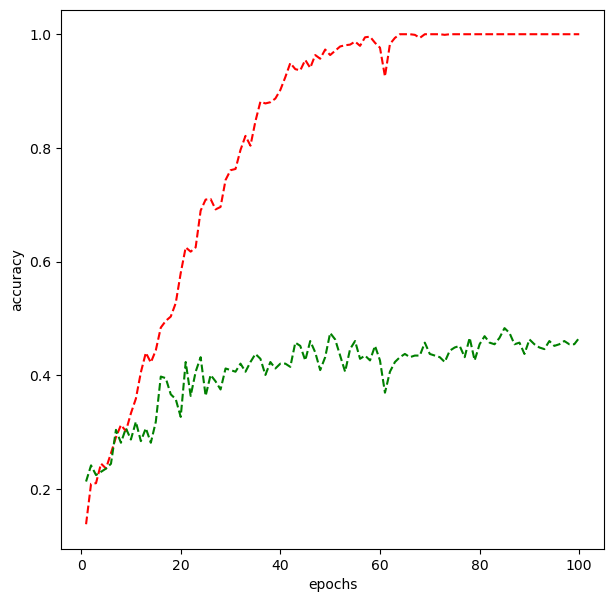

In [ ]:
import matplotlib.pyplot as plt

acc = history_lrcn.history['accuracy']
val_acc = history_lrcn.history['val_accuracy']
plt.figure(figsize= (7,7))
plt.plot(np.arange(1,101,1),acc, color = 'red', linestyle= 'dashed')
plt.plot(np.arange(1,101,1), val_acc, color= 'green', linestyle= 'dashed')
plt.xlabel('epochs')
plt.ylabel('accuracy')



Text(0, 0.5, 'loss')

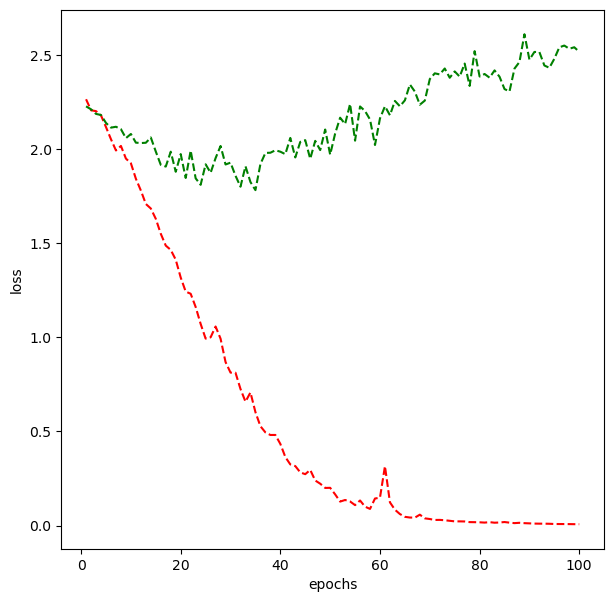

In [ ]:
loss = history_lrcn.history['loss']
val_loss = history_lrcn.history['val_loss']
plt.figure(figsize= (7,7))
plt.plot(np.arange(1,101,1),loss, color = 'red', linestyle= 'dashed')
plt.plot(np.arange(1,101,1), val_loss, color= 'green', linestyle= 'dashed')
plt.xlabel('epochs')
plt.ylabel('loss')